#### Medical insurance price prediction using Decision Tree Regression

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [33]:
data =pd.read_csv("Data/Medical_insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [34]:
data_missing = data.isnull().sum()
data_missing

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [36]:
data =pd.get_dummies(data, columns =["sex","smoker","region"], drop_first =True)
print(data.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


In [37]:
X =data.drop(columns=["charges"])
y =data["charges"]

In [38]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

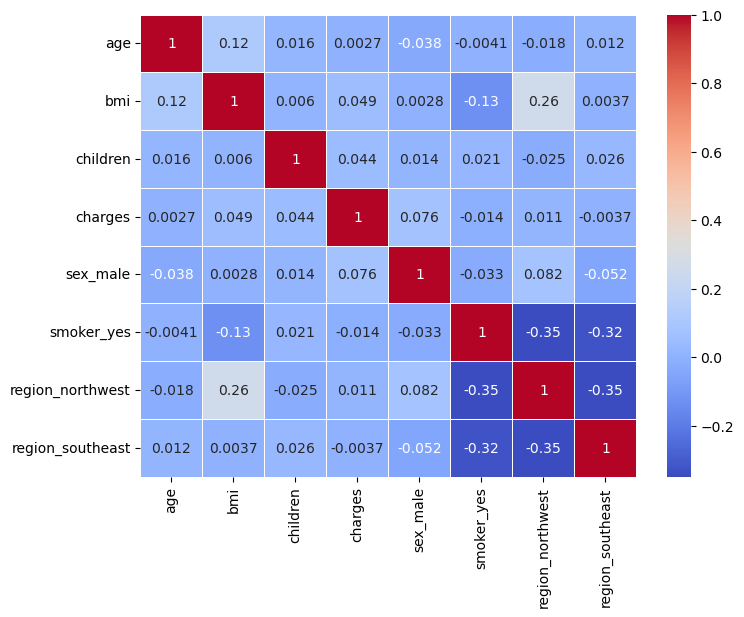

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#columns = ['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
X_train_df = pd.DataFrame(X_train, columns=data.columns[:-1])

# Compute correlation matrix
corr_matrix = X_train_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Rotate labels for better visibility
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show plot
plt.show()

#### Lasso Regression Model

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001) 
lasso.fit(X_train, y_train)
y_pred= lasso.predict(X_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 39933195.18466448


In [45]:
r2_score(y_test, y_pred)*100 

73.98166136085995

#### Decision Tree Regression

In [41]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred2 = tree_model.predict(X_test)

In [44]:
mae= mean_absolute_error(y_test, y_pred2)
print(f'mean absolute error is: {mae}')

mean absolute error is: 585.615060054054


In [46]:
r2_score(y_test, y_pred2)*100 

94.89597074961878

In [47]:
new_patient = pd.DataFrame({
    'age': [38],
    'sex': ['male'],
    'bmi': [22.500],  
    'children': [0],
    'smoker': ['no'],
    'region':['southwest']
})
new_patient

,age,sex,bmi,children,smoker,region
0,38,male,22.5,0,no,southwest


In [48]:
new_patient_encoded = pd.get_dummies(new_patient, columns =["sex","smoker","region"])
new_patient_encoded

,age,bmi,children,sex_male,smoker_no,region_southwest
0,38,22.5,0,1,1,1


In [51]:
required_columns = ['age','bmi','children','sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']
for col in required_columns:
    if col not in new_patient_encoded:
        new_patient[col] = 0
        
required_columns

['age',
 'bmi',
 'children',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [52]:
# Ensure missing columns are handled
new_patient_encoded = new_patient_encoded.reindex(columns=required_columns, fill_value=0)

# Display the updated dataframe
new_patient_encoded

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,38,22.5,0,1,0,0,0,1


In [56]:
y_pred2 =tree_model.predict(new_patient_encoded)
y_pred2

array([14418.2804])